# Tensor Content

## Tensor properties

+ ranks
+ shapes
+ types

## Create Tensor

## Simple Tensor Operation

## Tensor Properties

In [49]:
import numpy as np
import torch as t
from IPython.display import Image

In [10]:
# ranks, quantity of dimensions, 维数
# rank 1, access by a[i]
# rank 2, access by a[i, j]
# rank 3, access by a[i, j, k]
# and so on

tv1 = t.IntTensor([1, 2, 3]); print(tv1.dim(), tv1[0])
tv2 = t.IntTensor([[1, 2], [3, 4], [5, 6]]); print(tv2.dim(), tv2[0, 0])
tv4 = t.IntTensor([[[[1, 2]]], [[[3, 4]]], [[[5, 6]]]]); print(tv4.dim())
print(tv4)

1 1
2 1
4

(0 ,0 ,.,.) = 
  1  2

(1 ,0 ,.,.) = 
  3  4

(2 ,0 ,.,.) = 
  5  6
[torch.IntTensor of size 3x1x1x2]



In [11]:
# shapes
print(tv1.shape, tv2.shape, tv4.shape)

torch.Size([3]) torch.Size([3, 2]) torch.Size([3, 1, 1, 2])


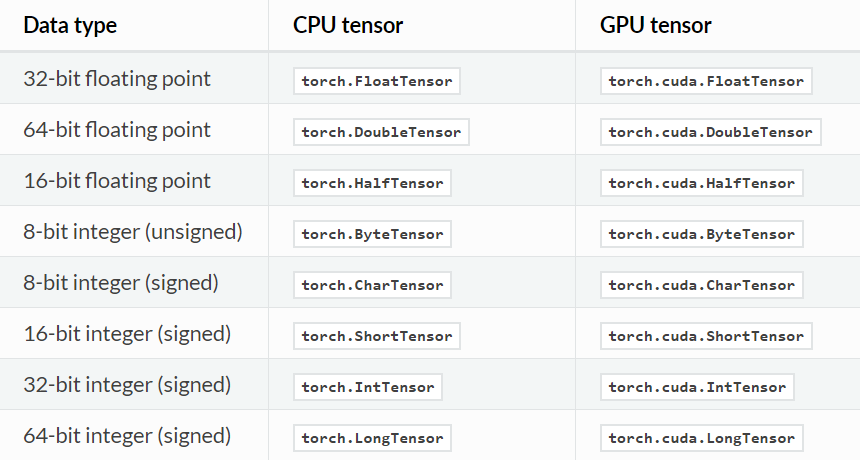

In [15]:
# data types, 数据类型分开的
Image("../img/tensor_dtypes.png")

## Create Tensor

In [16]:
# Create from python list
t.Tensor([[1, 2], [3, 4], [5, 6]])


 1  2
 3  4
 5  6
[torch.FloatTensor of size 3x2]

In [19]:
# from numpy
t.Tensor(np.random.rand(2, 3, 4))


(0 ,.,.) = 
  0.6122  0.1892  0.8103  0.3599
  0.6924  0.6471  0.2238  0.6774
  0.6720  0.7904  0.9123  0.1258

(1 ,.,.) = 
  0.1434  0.7850  0.6042  0.4630
  0.3637  0.1078  0.3666  0.0354
  0.5247  0.8758  0.4472  0.0753
[torch.FloatTensor of size 2x3x4]

In [21]:
# by itself, almost all the numpy creation methods.
t.eye(5)            # diagonal matrix


 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1
[torch.FloatTensor of size 5x5]

In [25]:
t.linspace(start=0, end=3, steps=10)          # linear space


 0.0000
 0.3333
 0.6667
 1.0000
 1.3333
 1.6667
 2.0000
 2.3333
 2.6667
 3.0000
[torch.FloatTensor of size 10]

In [29]:
t.logspace(start=-5, end=5, steps=10)        # 10^start, 10^end


 1.0000e-05
 1.2915e-04
 1.6681e-03
 2.1544e-02
 2.7826e-01
 3.5938e+00
 4.6416e+01
 5.9948e+02
 7.7426e+03
 1.0000e+05
[torch.FloatTensor of size 10]

In [31]:
t.ones(3, 4)            # matrix with 1


 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]

## Simple Tensor Operation

In [32]:
x = t.rand(2, 3)
print(x)


 0.1419  0.7893  0.6701
 0.6169  0.1881  0.9523
[torch.FloatTensor of size 2x3]



In [33]:
# 合成一个tensor
t.cat((x, x, ), dim=0)


 0.1419  0.7893  0.6701
 0.6169  0.1881  0.9523
 0.1419  0.7893  0.6701
 0.6169  0.1881  0.9523
[torch.FloatTensor of size 4x3]

In [35]:
tc = t.cat((x, x, ), 1); tc


 0.1419  0.7893  0.6701  0.1419  0.7893  0.6701
 0.6169  0.1881  0.9523  0.6169  0.1881  0.9523
[torch.FloatTensor of size 2x6]

In [39]:
# 划分成不同的tensor小块
t.chunk(tc, 3, dim=1)     # split tensor into small chunks tensor.

(
  0.1419  0.7893
  0.6169  0.1881
 [torch.FloatTensor of size 2x2], 
  0.6701  0.1419
  0.9523  0.6169
 [torch.FloatTensor of size 2x2], 
  0.7893  0.6701
  0.1881  0.9523
 [torch.FloatTensor of size 2x2])

In [40]:
# 从一个tensor选择其种的值进行重组新的tensor

t1 = t.Tensor([[1, 2], [3, 4]]); print(t1)

t.gather(t1, dim=1, index=t.LongTensor([[0, 0], [1, 0]]))


 1  2
 3  4
[torch.FloatTensor of size 2x2]




 1  1
 4  3
[torch.FloatTensor of size 2x2]

#### 如何详解上述步骤呢？

首先index和所取tensor的size应该是一样的，比如这里都是2x2

然后dim = 1, 说明tensor是按照维度1进行选取的

然后index[0] => [0, 0], 表明从第0行开始选取0个位置作为输出[0, 0]的值，0行第二个值也是0
index[1] => [1, 0], 对应第1行选取第1个和第0个值

比如dim = 0
那么输出应该就是

1   |   2      
3   |   4

col1: 1 3 <- [0, 1]  1,3      
col2: 2 2 <- [0, 0]  2,4

1  |   2      
3  |   2


In [41]:
t.gather(t1, dim=0, index=t.LongTensor([[0, 0], [1, 0]]))


 1  2
 3  2
[torch.FloatTensor of size 2x2]

#### 高纬度怎么办想不出来啊？

例如一个3D的tensor，选择不同的dim，那么选择的值稍微就有些不一样

```python
out[i][j][k] = input[index[i][j][k]][j][k]  # if dim == 0
out[i][j][k] = input[i][index[i][j][k]][k]  # if dim == 1
out[i][j][k] = input[i][j][index[i][j][k]]  # if dim == 2
```

上述2d的例子

```
# dim = 0
out[0, 0] = input[index[0, 0], 0]   # 1
out[0, 1] = input[index[0, 1], 1]   # 2
out[1, 0] = input[index[1, 0], 0]   # 3
out[1, 1] = input[index[1, 1], 1]   # 2
```

In [53]:
# 丢掉维度只有一个的tensor
ta = t.Tensor([[1]]); print(ta.shape)
t.squeeze(ta, dim=0)

torch.Size([1, 1])



 1
[torch.FloatTensor of size 1]

In [60]:
x = t.zeros(2, 1, 2, 1, 2);print(x.size())

y = t.squeeze(x); print(y.size())

print(t.squeeze(x, dim=0).size())

print(t.squeeze(x, dim=1).size())

print(t.squeeze(x, dim=3).size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 2])
torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])
torch.Size([2, 1, 2, 2])
